# Will add summary here

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

##  Will first import the VIX data fro mthe excel file and properly set the data before we begin  analysis. Initially there are many empty columns anfd missing data that needs to be addressed. For this analysis we will extract, UVXY, VIX, VXXBEN, UX1 to UX4, Day to Roll, Day of week, Daily Decay, Slope 

In [2]:
data = pd.read_excel("vix_data.xlsx")

## Looks like we have the original data as well as the edited data frame to work with below. We have a 3246 rows of data and will be working with 10 columns 

In [3]:
vix_DataFrame = pd.read_csv("working_data.csv", index_col="Date", parse_dates=True)

In [4]:
vix_DataFrame.head()

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of week,Days to Roll,UVXY % Change,SPY % Change,VXXBEN % Change,VIX % Change,UX1 % Change,UX2 % Change,UX3 % Change,UX4 % Change
Date,,,,,,,,,,,,,,,,,,
2006-10-23,8.377069e+09,137.47,1.910,11.08,11.95,13.16,14.08,14.60,2,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-24,8.377069e+09,137.88,2.025,10.78,11.78,12.83,14.03,14.47,3,16,0.000000,0.002982,0.060209,-0.027076,-0.014226,-0.025076,-0.003551,-0.008904
2006-10-25,7.968986e+09,138.35,1.760,10.66,11.49,12.52,13.79,14.52,4,15,-0.048714,0.003409,-0.130864,-0.011132,-0.024618,-0.024162,-0.017106,0.003455
2006-10-26,7.618653e+09,138.78,1.515,10.56,11.25,12.21,13.46,14.18,5,14,-0.043962,0.003108,-0.139205,-0.009381,-0.020888,-0.024760,-0.023930,-0.023416
2006-10-27,7.695087e+09,137.91,1.240,10.80,11.31,12.26,13.46,14.24,6,13,0.010032,-0.006269,-0.181518,0.022727,0.005333,0.004095,0.000000,0.004231


In [5]:
vix_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3246 entries, 2006-10-23 to 2019-09-16
Data columns (total 18 columns):
UVXY               3246 non-null float64
SPY                3246 non-null float64
VXXBEN             3246 non-null float64
VIX                3246 non-null float64
UX1                3246 non-null float64
UX2                3246 non-null float64
UX3                3246 non-null float64
UX4                3246 non-null float64
Day of week        3246 non-null int64
Days to Roll       3246 non-null int64
UVXY % Change      3245 non-null float64
SPY % Change       3245 non-null float64
VXXBEN % Change    3245 non-null float64
VIX % Change       3245 non-null float64
UX1 % Change       3245 non-null float64
UX2 % Change       3245 non-null float64
UX3 % Change       3245 non-null float64
UX4 % Change       3245 non-null float64
dtypes: float64(16), int64(2)
memory usage: 481.8 KB


## The head of the data will provide us the top 5 items

In [6]:
vix_DataFrame.head()

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of week,Days to Roll,UVXY % Change,SPY % Change,VXXBEN % Change,VIX % Change,UX1 % Change,UX2 % Change,UX3 % Change,UX4 % Change
Date,,,,,,,,,,,,,,,,,,
2006-10-23,8.377069e+09,137.47,1.910,11.08,11.95,13.16,14.08,14.60,2,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-24,8.377069e+09,137.88,2.025,10.78,11.78,12.83,14.03,14.47,3,16,0.000000,0.002982,0.060209,-0.027076,-0.014226,-0.025076,-0.003551,-0.008904
2006-10-25,7.968986e+09,138.35,1.760,10.66,11.49,12.52,13.79,14.52,4,15,-0.048714,0.003409,-0.130864,-0.011132,-0.024618,-0.024162,-0.017106,0.003455
2006-10-26,7.618653e+09,138.78,1.515,10.56,11.25,12.21,13.46,14.18,5,14,-0.043962,0.003108,-0.139205,-0.009381,-0.020888,-0.024760,-0.023930,-0.023416
2006-10-27,7.695087e+09,137.91,1.240,10.80,11.31,12.26,13.46,14.24,6,13,0.010032,-0.006269,-0.181518,0.022727,0.005333,0.004095,0.000000,0.004231


### To begin we will plot each of the items against the date time index in a simple graph

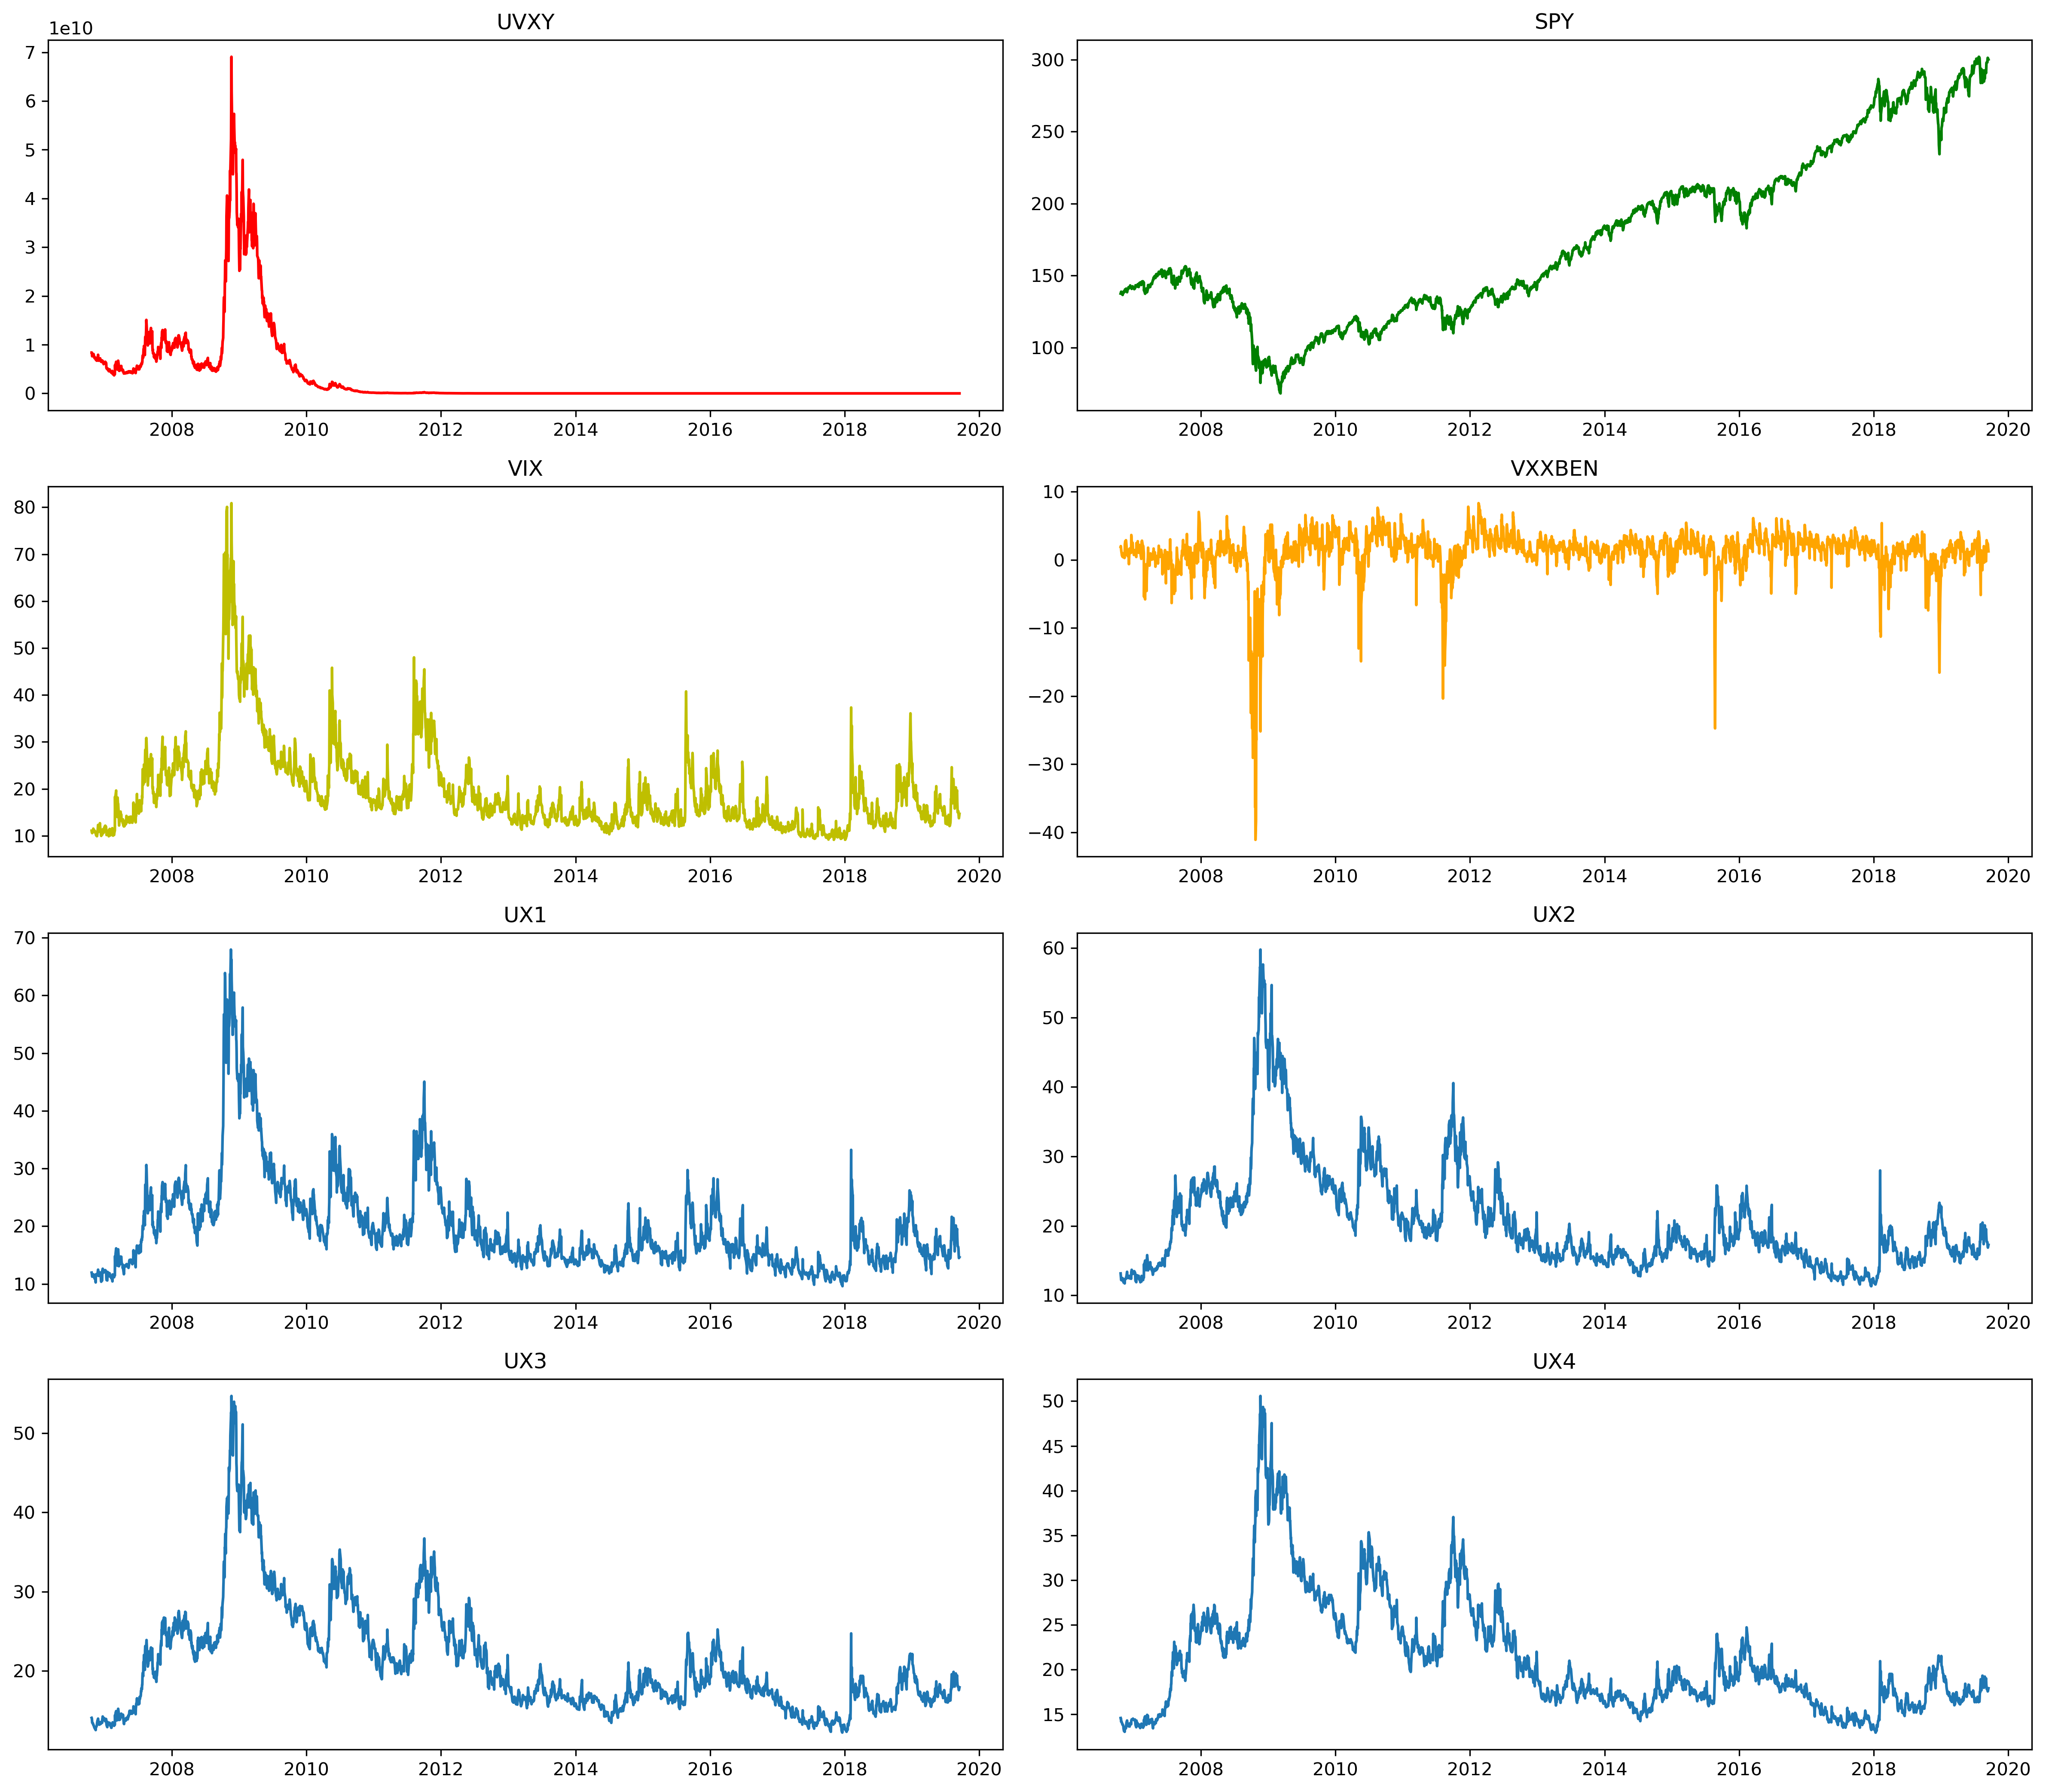

In [7]:
fig, axes = plt.subplots(4,2, dpi = 300, figsize = (16,14))
axes[0,0].plot(vix_DataFrame["UVXY"], c = "r")
axes[0,0].set_title("UVXY")
axes[0,1].plot(vix_DataFrame["SPY"], c = "g")
axes[0,1].set_title("SPY")
axes[1,0].plot(vix_DataFrame["VIX"], c = "y")
axes[1,0].set_title("VIX")
axes[1,1].plot(vix_DataFrame["VXXBEN"], c= "orange")
axes[1,1].set_title("VXXBEN")
axes[2,0].plot(vix_DataFrame["UX1"])
axes[2,0].set_title("UX1")
axes[2,1].plot(vix_DataFrame["UX2"])
axes[2,1].set_title("UX2")
axes[3,0].plot(vix_DataFrame["UX3"])
axes[3,0].set_title("UX3")
axes[3,1].plot(vix_DataFrame["UX4"])
axes[3,1].set_title("UX4")
plt.tight_layout()

### From these above we see a few patterns. VIX, UX1 - 4 and VXXBEN is inversely coorelated as well . UVXY never seemed to climb back after the fall in 2010. ALso see that when SPY takes a dip so does VXXBEN. 2008 was the big hit on all of the data above so we will try to find some patterns in the movment of the data.

____

### We will check the daily changes for each series of the data sets

In [8]:
vix_DataFrame["UVXY % Change"] = ((vix_DataFrame["UVXY"]/vix_DataFrame["UVXY"].shift(1)) -1)

In [9]:
vix_DataFrame["SPY % Change"] = ((vix_DataFrame["SPY"]/vix_DataFrame["SPY"].shift(1)) -1) 

In [10]:
vix_DataFrame["VXXBEN % Change"] = ((vix_DataFrame["VXXBEN"]/vix_DataFrame["VXXBEN"].shift(1)) -1) 

In [11]:
vix_DataFrame["VIX % Change"] = ((vix_DataFrame["VIX"]/vix_DataFrame["VIX"].shift(1)) -1)

In [12]:
vix_DataFrame["UX1 % Change"] = ((vix_DataFrame["UX1"]/vix_DataFrame["UX1"].shift(1)) -1)

In [13]:
vix_DataFrame["UX2 % Change"] = ((vix_DataFrame["UX2"]/vix_DataFrame["UX2"].shift(1)) -1) 

In [14]:
vix_DataFrame["UX3 % Change"] = ((vix_DataFrame["UX3"]/vix_DataFrame["UX3"].shift(1)) -1)

In [15]:
vix_DataFrame["UX4 % Change"] = ((vix_DataFrame["UX4"]/vix_DataFrame["UX4"].shift(1)) -1)

In [16]:
vix_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3246 entries, 2006-10-23 to 2019-09-16
Data columns (total 18 columns):
UVXY               3246 non-null float64
SPY                3246 non-null float64
VXXBEN             3246 non-null float64
VIX                3246 non-null float64
UX1                3246 non-null float64
UX2                3246 non-null float64
UX3                3246 non-null float64
UX4                3246 non-null float64
Day of week        3246 non-null int64
Days to Roll       3246 non-null int64
UVXY % Change      3245 non-null float64
SPY % Change       3245 non-null float64
VXXBEN % Change    3245 non-null float64
VIX % Change       3245 non-null float64
UX1 % Change       3245 non-null float64
UX2 % Change       3245 non-null float64
UX3 % Change       3245 non-null float64
UX4 % Change       3245 non-null float64
dtypes: float64(16), int64(2)
memory usage: 481.8 KB


## We will check if there are any correlation between the changes of each series

In [17]:
vix_DataFrame = pd.read_csv("working_data.csv", index_col = "Date", parse_dates = True)

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


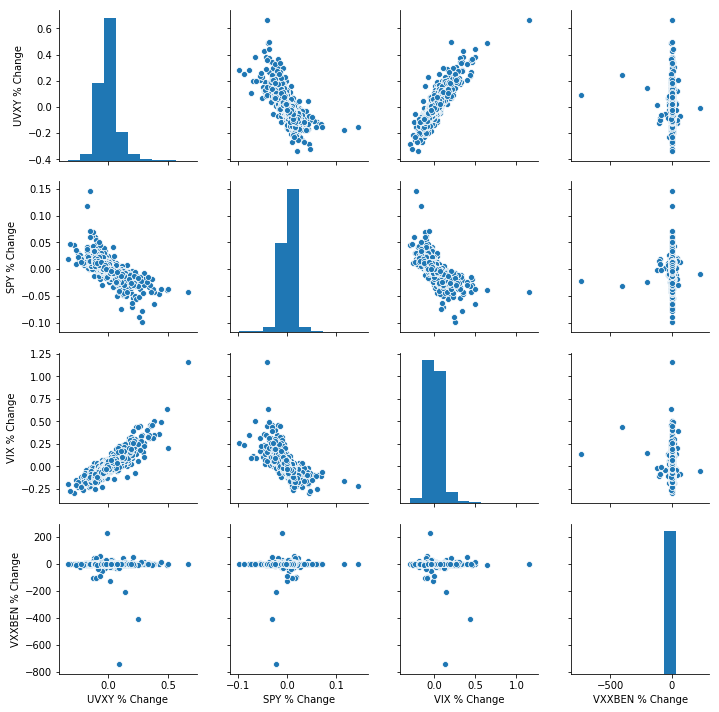

In [18]:
sns.pairplot(vix_DataFrame[["UVXY % Change", "SPY % Change", "VIX % Change","VXXBEN % Change"]])

## The Scatter matrix above shows that there is some correlation in the changes of UVXY and VIX, a negative correlation between VIX and SPY, Negative between UVXY and SPY, and a very strong correlation between UVXY and  VIX, Lets put this to the test by plotting a heat map with the chenges in these items

In [19]:
change_Matrix = vix_DataFrame[["UVXY % Change", "SPY % Change", "VIX % Change","VXXBEN % Change"]].corr()
change_Matrix

,UVXY % Change,SPY % Change,VIX % Change,VXXBEN % Change
UVXY % Change,1.000000,-0.767666,0.882705,-0.042276
SPY % Change,-0.767666,1.000000,-0.724097,0.046464
VIX % Change,0.882705,-0.724097,1.000000,-0.068953
VXXBEN % Change,-0.042276,0.046464,-0.068953,1.000000


## We can see above in the matrix that there is some strong correlaiton between the chenged in these data series

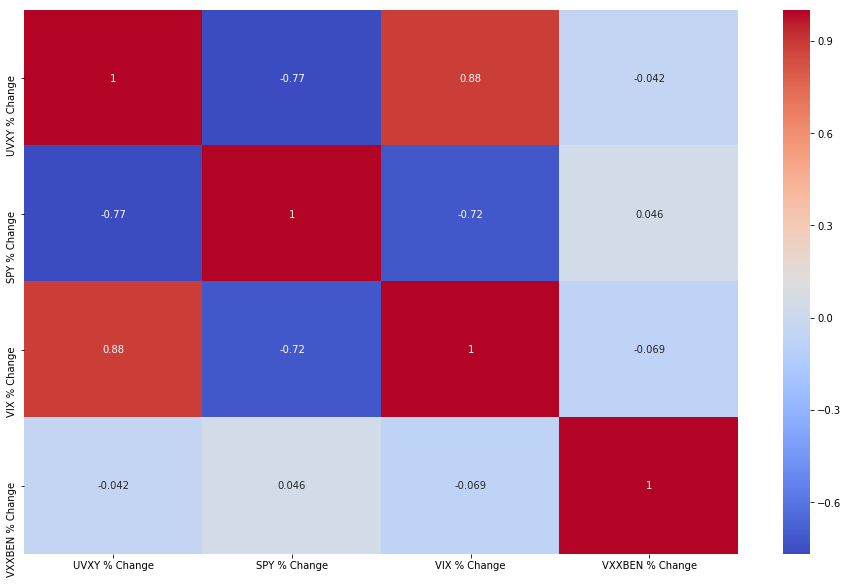

In [20]:
plt.figure(figsize=(16,10))
sns.heatmap(change_Matrix, annot=True, cmap = "coolwarm")

### to get a better understanding of the data series we will also check the correlation in the daily changes betwee VIX and UX1 -> 4

In [21]:
corr_vix_UX1to = vix_DataFrame[["VIX % Change", "UX1 % Change", "UX2 % Change", "UX3 % Change", "UX4 % Change"]].corr()

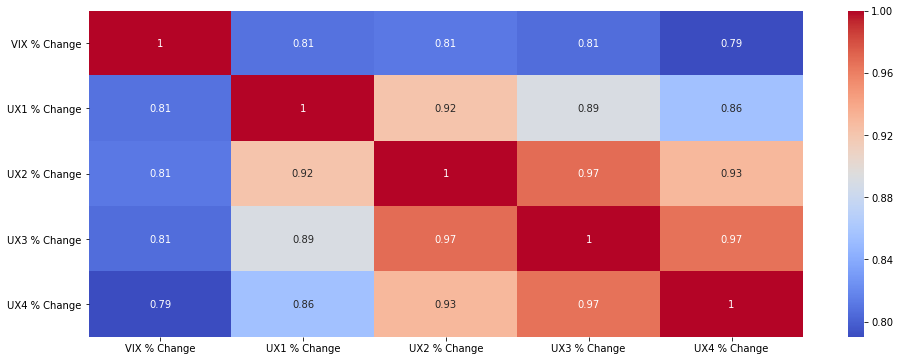

In [22]:
plt.figure(figsize=(16,6))
sns.heatmap(corr_vix_UX1to, annot=True, cmap = "coolwarm")

### We find thst there is a strong correlation between VIX and UX1 -> 4.  With the above chart showing that there is an 88% correlation between VIX and UVXY we can assume that there is a strong corrlation between UVXY and UX1->4. We will plot this again including UVXY

In [23]:
corr_vix_UVXY_UX = vix_DataFrame[["VIX % Change", "UVXY % Change","UX1 % Change", "UX2 % Change", "UX3 % Change", "UX4 % Change"]].corr()

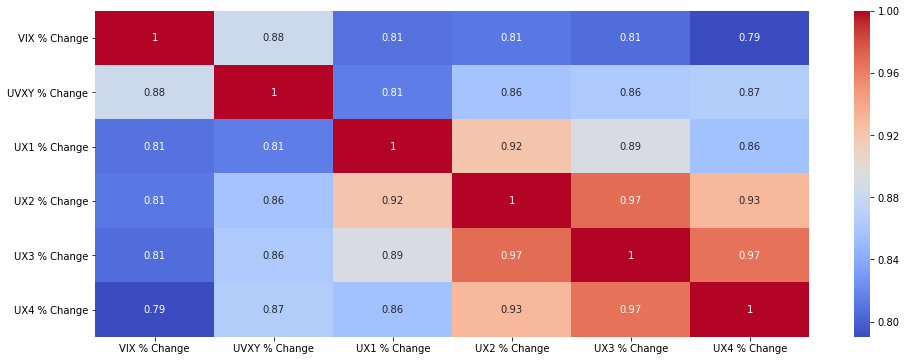

In [24]:
plt.figure(figsize=(16,6))
sns.heatmap(corr_vix_UVXY_UX, annot=True, cmap="coolwarm")

### With the above correlaton heatmap analysis these data series should move in the same patterns over the period so we will take a look at this using a simple box plot

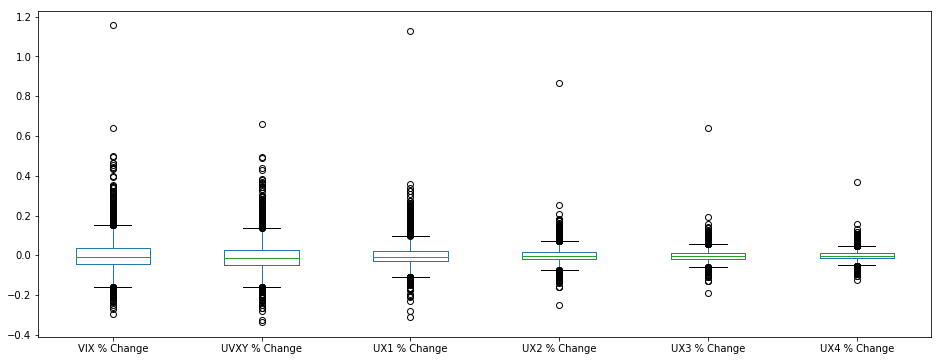

In [25]:
vix_DataFrame[["VIX % Change", "UVXY % Change","UX1 % Change", "UX2 % Change", "UX3 % Change", "UX4 % Change"]].plot(kind = "box", figsize = (16,6))


## This seems to be that the data share a consistant pattern in change with a few outlyers in the data. 

## Let take a look at VIX in relation to the roll days. We will groupthe data and see the average for vix as the data to roll changes

In [26]:
days_Rolling = vix_DataFrame.groupby("Days to Roll").mean()
days_Rolling

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of week,UVXY % Change,SPY % Change,VXXBEN % Change,VIX % Change,UX1 % Change,UX2 % Change,UX3 % Change,UX4 % Change
Days to Roll,,,,,,,,,,,,,,,,,
1,3.296700e+09,176.362839,0.726968,18.979742,19.160839,20.071516,20.712548,21.116323,2.380645,-0.020180,0.001984,-0.826698,-0.009653,-0.009672,-0.008110,-0.004657,-0.003910
2,3.322420e+09,176.036978,0.624565,19.223548,19.334742,20.250290,20.807548,21.192452,1.619355,-0.008328,0.000338,-0.396803,0.008223,-0.008065,-0.004580,-0.002802,-0.000768
3,3.319185e+09,175.939890,0.901194,19.209806,19.544097,20.343613,20.868484,21.213645,3.638710,-0.008257,0.000306,-1.149735,0.001449,-0.005497,-0.003357,-0.002421,-0.001885
4,3.279151e+09,175.867392,0.986597,19.211419,19.614323,20.378806,20.890484,21.230290,4.245161,-0.009956,0.002409,-0.041512,-0.013468,-0.009658,-0.005030,-0.004410,-0.003821
5,3.299350e+09,175.591529,0.718484,19.575226,19.828968,20.504710,20.997452,21.320742,3.245161,0.010103,-0.001462,-0.012062,0.007814,0.004708,0.004107,0.004240,0.003496
6,3.214681e+09,175.737003,0.855274,19.319355,19.644419,20.379774,20.879645,21.223290,2.277419,0.000861,-0.000189,-2.841599,0.005145,0.001412,-0.000590,-0.000758,0.000127
7,3.201395e+09,175.822015,0.828032,19.365935,19.674355,20.405161,20.906710,21.228419,1.651613,-0.008285,0.001587,-0.022451,0.002598,-0.006006,-0.004897,-0.003761,-0.002716
8,3.271576e+09,175.616031,0.918468,19.490452,19.881452,20.545387,21.005710,21.300871,3.651613,-0.002355,0.000821,-0.305270,0.006122,0.005244,0.002591,0.001670,0.000928
9,3.300109e+09,175.540071,0.965371,19.372581,19.767161,20.514161,20.989839,21.291839,4.187097,0.004792,-0.001545,-4.604474,0.005004,0.003023,0.002303,0.002645,0.002391


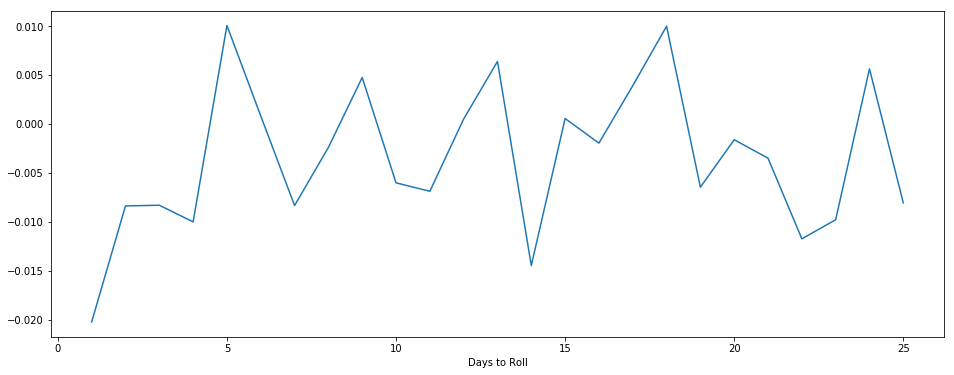

In [27]:
days_Rolling["UVXY % Change"].plot(figsize = (16,6))

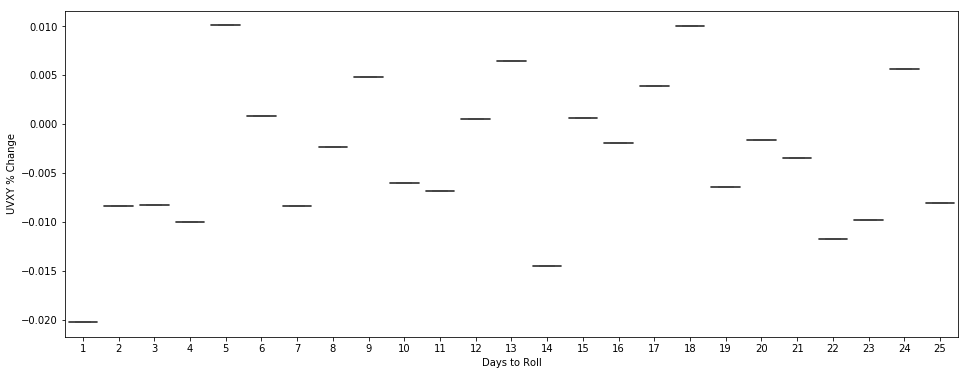

In [28]:
plt.figure(figsize=(16,6))
sns.boxplot(x = days_Rolling.index, y = "UVXY % Change", data= days_Rolling)

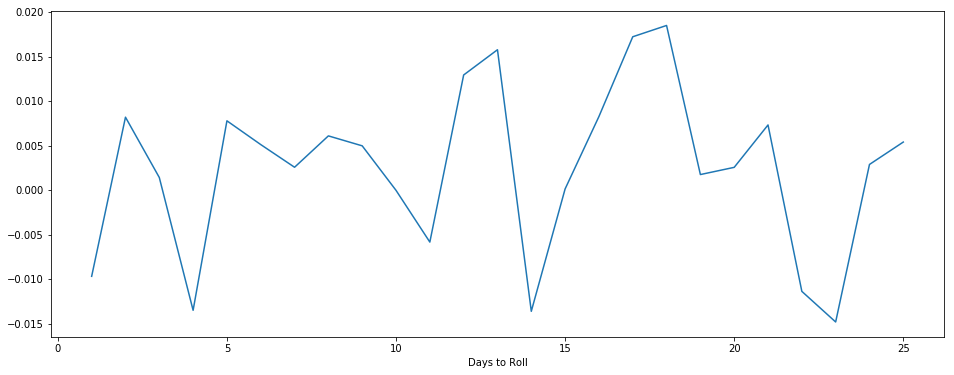

In [29]:
days_Rolling["VIX % Change"].plot(figsize = (16,6))

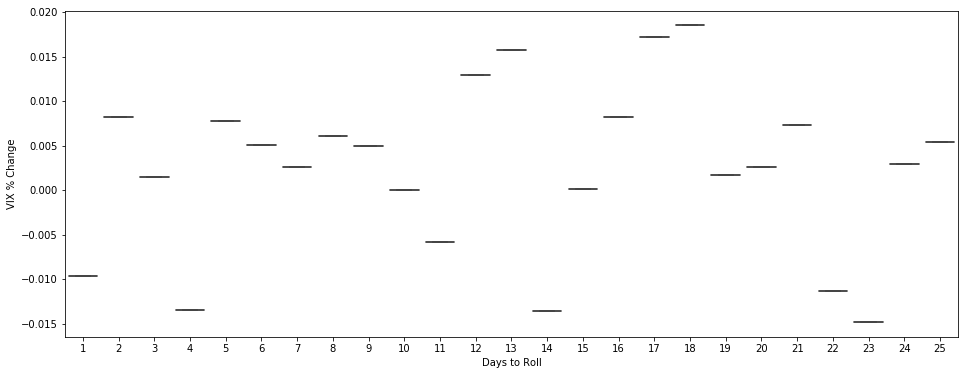

In [30]:
plt.figure(figsize=(16,6))
sns.boxplot(x = days_Rolling.index, y = "VIX % Change", data= days_Rolling)

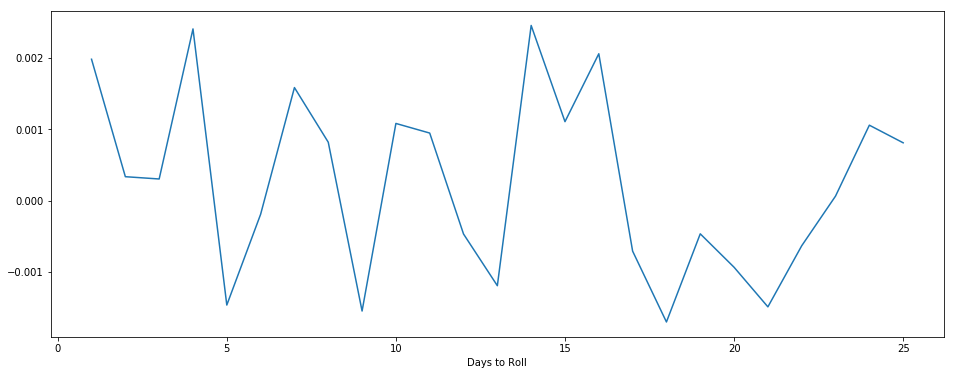

In [31]:
days_Rolling["SPY % Change"].plot(figsize = (16,6))

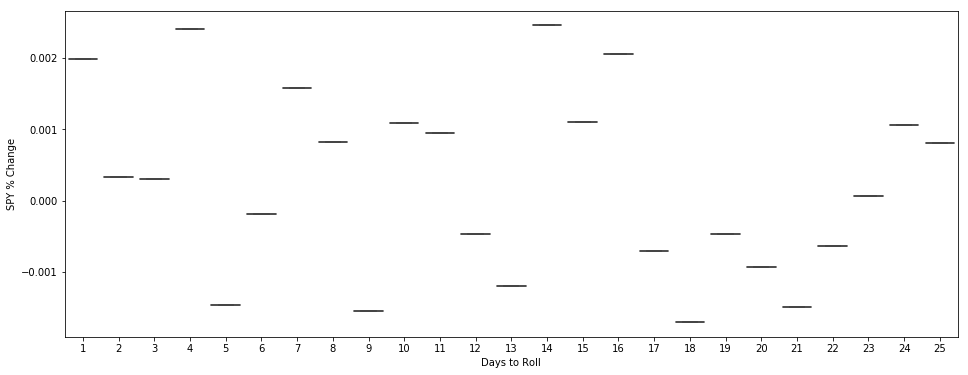

In [32]:
plt.figure(figsize=(16,6))
sns.boxplot(x = days_Rolling.index, y = "SPY % Change", data= days_Rolling)

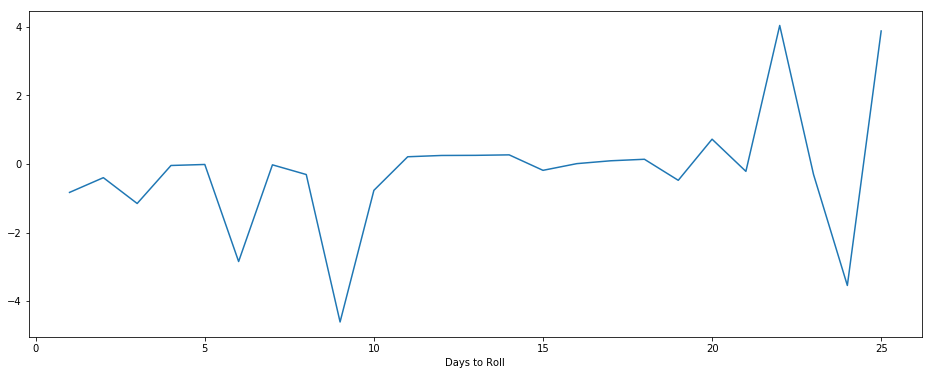

In [33]:
days_Rolling["VXXBEN % Change"].plot(figsize = (16,6))

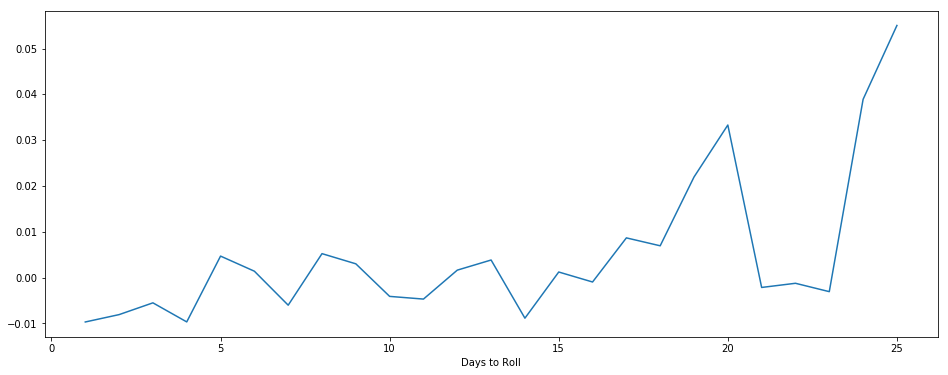

In [34]:
days_Rolling["UX1 % Change"].plot(figsize = (16,6))

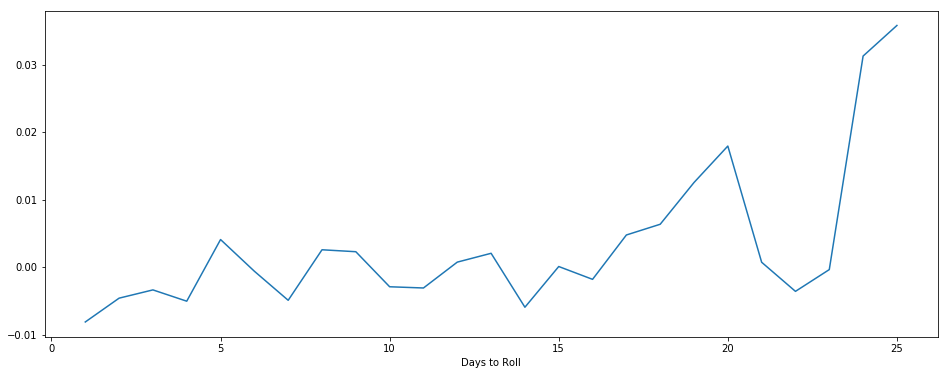

In [35]:
days_Rolling["UX2 % Change"].plot(figsize = (16,6))

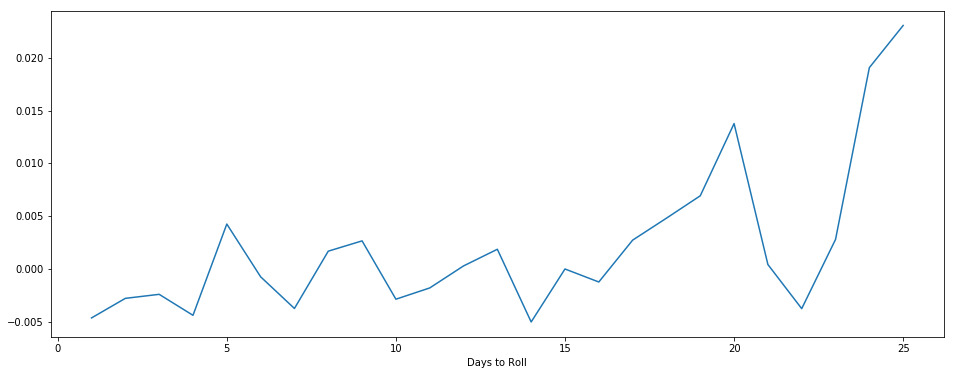

In [36]:
days_Rolling["UX3 % Change"].plot(figsize = (16,6))

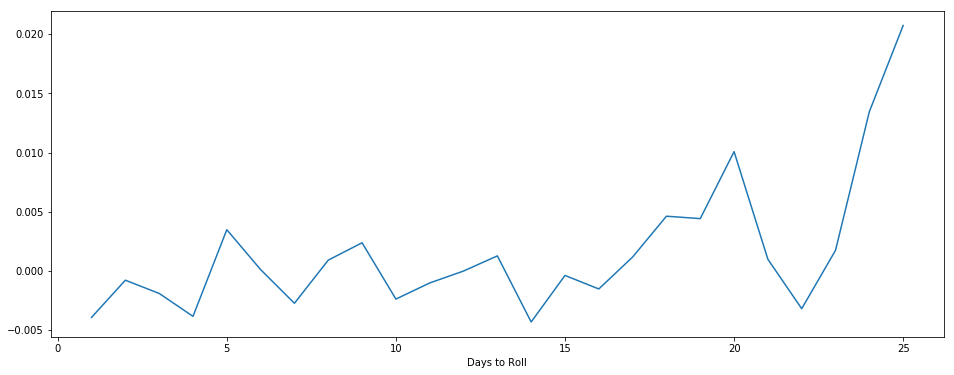

In [37]:
days_Rolling["UX4 % Change"].plot(figsize = (16,6))

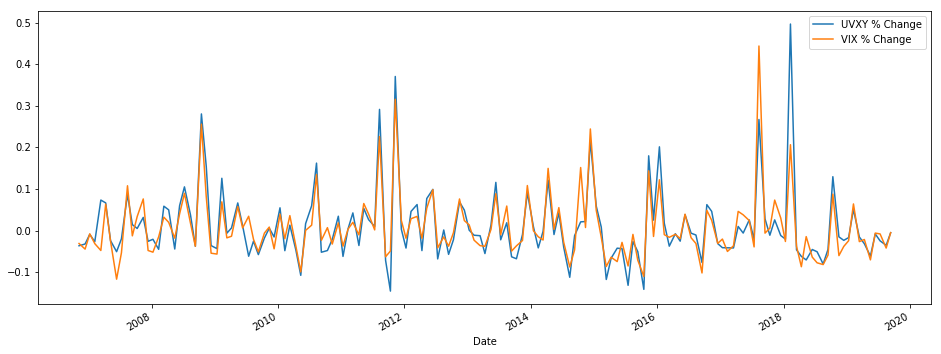

In [38]:
vix_DataFrame[vix_DataFrame["Days to Roll"] == 5][["UVXY % Change", "VIX % Change"]].plot(figsize = (16,6))

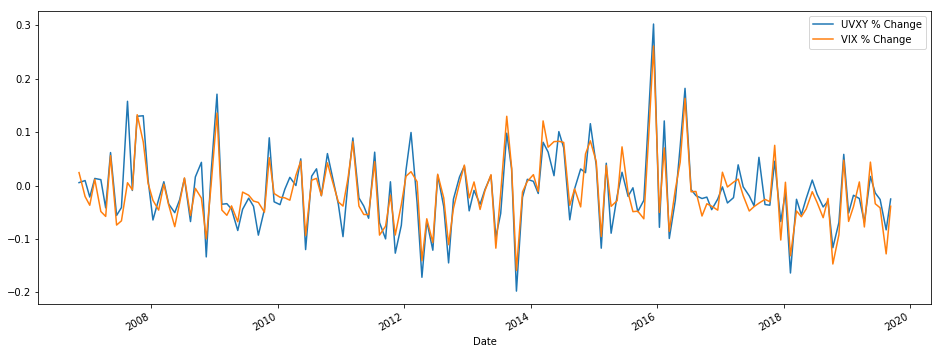

In [39]:
vix_DataFrame[(vix_DataFrame["Days to Roll"] == 4)][["UVXY % Change", "VIX % Change"]].plot(figsize = (16,6))




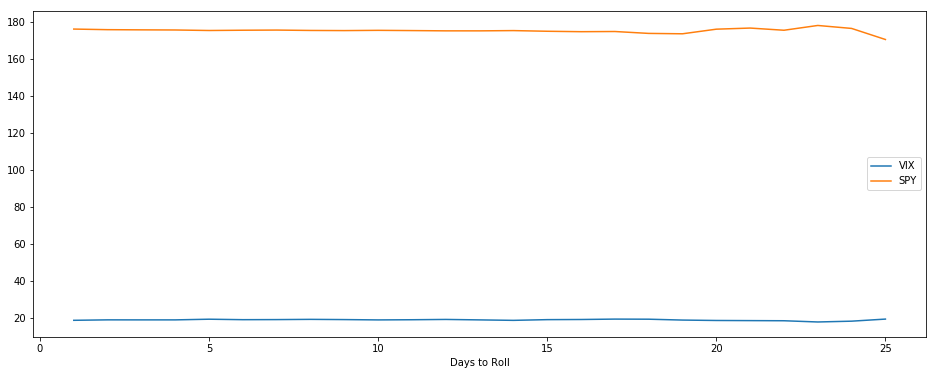

In [40]:
vix_DataFrame.groupby("Days to Roll").mean()[["VIX","SPY"]].plot(figsize = (16,6))

#### From the above plot it appears the vix stays in the range of 19 to 19.6  on average until 20 to 25 days to roll. lets take a look at vix behavior when, first the roll day is between 0 and 20. Then we will take a look at th behavior of vix between 20 and 25

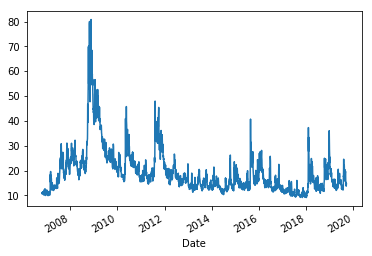

In [41]:
vix_DataFrame[(vix_DataFrame["Days to Roll"] >= 0) & (vix_DataFrame["Days to Roll"] < 20)]["VIX"].plot()

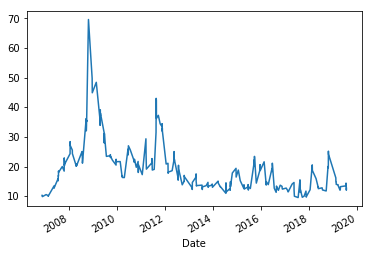

In [42]:
vix_DataFrame[(vix_DataFrame["Days to Roll"] >= 20) & (vix_DataFrame["Days to Roll"] <= 25)]["VIX"].plot()